In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/GGColab_Project/House_Price_Prediction/houses_data.csv', index_col="Id")

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [19]:
# Features selection
X_features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd" ]

In [26]:
# Splitting dataset
X = df[X_features]
y = df["SalePrice"]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


In [21]:
y.head()

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

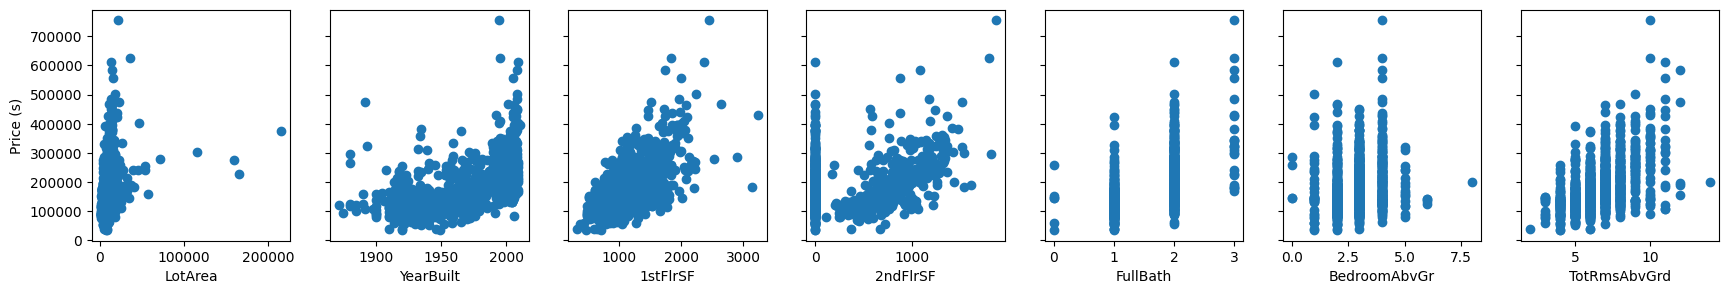

In [58]:
#Visualize
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

fig,ax=plt.subplots(1, 7, figsize=(21, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (s)")
plt.show()

In [47]:
#Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[213945    138   2894   1872      3      8     12]
Peak to Peak range by column in Normalized X:[19.99561191  4.54030009  7.75548634  4.27445724  5.48984372  9.97726466
  7.39008653]


In [29]:
# Training model
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 14, number of weight updates: 16353.0


In [54]:
# Make prediction
y_pred_sgd = sgdr.predict(X_test_norm)
# print(f"Prediction on training set:\n{y_pred_sgd[:7].round(2)}" )
# print(f"Target values: \n{y_train[:7]}")

Prediction on training set:
[292231.52 144577.99 118204.11 214888.47 118133.82  80125.03 212674.33]
Target values: 
[314813 109500 163500 271000 205000 185000 160000]


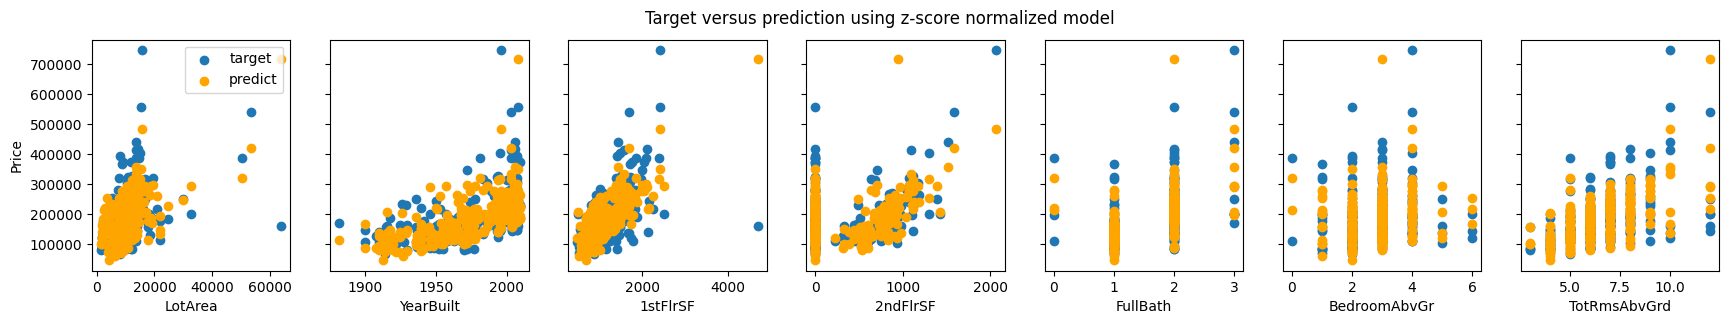

In [59]:
# Plot Results
fig,ax=plt.subplots(1,7,figsize=(21,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test[:,i],y_pred_sgd,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()